In [1]:
# Imports
import pickle
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from copy import deepcopy
# import plotly.graph_objects as go
from scipy.optimize import curve_fit
from dataclasses import make_dataclass

import sys
module_path = 'code' 
if module_path not in sys.path:
    sys.path.append(module_path)

# Markus's code
from MM_Plot_Utils import plot, hist
from MM_Maze_Utils import *
from MM_Traj_Utils import *

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
# Some lists of nicknames for mice
UnrewNames=['B5','B6','B7','D3','D4','D5','D6','D7','D8','D9']
RewNames=['B1','B2','B3','B4','C1','C3','C6','C7','C8','C9']
AllNames=RewNames+UnrewNames
UnrewNamesSub=['B5','B6','B7','D3','D4','D5','D7','D8','D9'] # excluding D6 which barely entered the maze

frame rate = 30 Hz

In [3]:
rwd_node = 116

In [4]:
# List number of bouts for each animal
print('mouse  bouts')
to=0
max_bouts = 0
for nickname in AllNames:
    tf = LoadTraj(nickname+'-tf')
    print(nickname+'     ',len(tf.no))
    
    if len(tf.no) > max_bouts:
        max_bouts = len(tf.no)
        
    to+=len(tf.no)
print('Total  ',to)

mouse  bouts
B1      104
B2      166
B3      147
B4      238
C1      173
C3      339
C6      150
C7      135
C8      164
C9      127
B5      245
B6      223
B7      204
D3      245
D4      319
D5      180
D6      59
D7      150
D8      109
D9      102
Total   3579


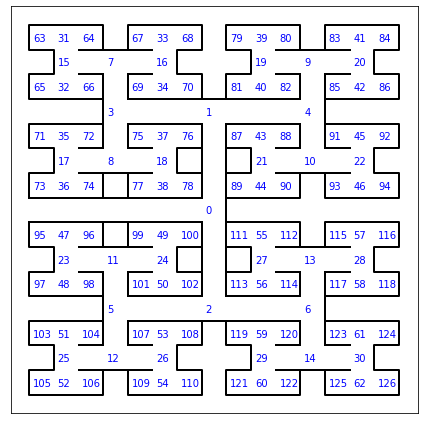

In [5]:
# Draw maze with node numbers
ma=NewMaze(6)
PlotMazeNodes(ma,figsize=6)

In [42]:
# define cell numbers of end/leaf nodes
lv6_nodes = list(range(63,127))
lv5_nodes = list(range(31,63))
lv4_nodes = list(range(15,31))
lv3_nodes = list(range(7,15))
lv2_nodes = list(range(3,7))
lv1_nodes = list(range(1,3))
lv0_nodes = list(range(0,1))
lvl_dict = {0:lv0_nodes, 1:lv1_nodes, 2:lv2_nodes, 3:lv3_nodes, 4:lv4_nodes, 5:lv5_nodes, 6:lv6_nodes}

In [66]:
inv_lvl_dict = {n: level for level, nodes in lvl_dict.items() for n in nodes}
inv_lvl_dict[127] = -1

In [67]:
inv_lvl_dict

{0: 0,
 1: 1,
 2: 1,
 3: 2,
 4: 2,
 5: 2,
 6: 2,
 7: 3,
 8: 3,
 9: 3,
 10: 3,
 11: 3,
 12: 3,
 13: 3,
 14: 3,
 15: 4,
 16: 4,
 17: 4,
 18: 4,
 19: 4,
 20: 4,
 21: 4,
 22: 4,
 23: 4,
 24: 4,
 25: 4,
 26: 4,
 27: 4,
 28: 4,
 29: 4,
 30: 4,
 31: 5,
 32: 5,
 33: 5,
 34: 5,
 35: 5,
 36: 5,
 37: 5,
 38: 5,
 39: 5,
 40: 5,
 41: 5,
 42: 5,
 43: 5,
 44: 5,
 45: 5,
 46: 5,
 47: 5,
 48: 5,
 49: 5,
 50: 5,
 51: 5,
 52: 5,
 53: 5,
 54: 5,
 55: 5,
 56: 5,
 57: 5,
 58: 5,
 59: 5,
 60: 5,
 61: 5,
 62: 5,
 63: 6,
 64: 6,
 65: 6,
 66: 6,
 67: 6,
 68: 6,
 69: 6,
 70: 6,
 71: 6,
 72: 6,
 73: 6,
 74: 6,
 75: 6,
 76: 6,
 77: 6,
 78: 6,
 79: 6,
 80: 6,
 81: 6,
 82: 6,
 83: 6,
 84: 6,
 85: 6,
 86: 6,
 87: 6,
 88: 6,
 89: 6,
 90: 6,
 91: 6,
 92: 6,
 93: 6,
 94: 6,
 95: 6,
 96: 6,
 97: 6,
 98: 6,
 99: 6,
 100: 6,
 101: 6,
 102: 6,
 103: 6,
 104: 6,
 105: 6,
 106: 6,
 107: 6,
 108: 6,
 109: 6,
 110: 6,
 111: 6,
 112: 6,
 113: 6,
 114: 6,
 115: 6,
 116: 6,
 117: 6,
 118: 6,
 119: 6,
 120: 6,
 121: 6,
 122: 6,
 12

In [16]:
nickname = "C1"

In [17]:
tf=LoadTraj(nickname+'-tf')

Text(0.5, 0, 'Bout')

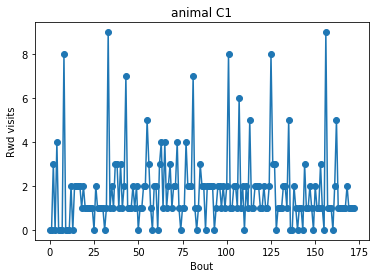

In [20]:
rwd_visits_in_bouts = [sum(tf.no[bout][:,0]==rwd_node) for bout in np.arange(len(tf.no))]
plt.plot(np.arange(len(tf.no)), rwd_visits_in_bouts, 'o-')
plt.title('animal %s' % nickname)
plt.ylabel("Rwd visits")
plt.xlabel("Bout")

In [ ]:
for bout in range(len(tf.no)):
    print("Bout: %2d visits to water port %d" % (bout, sum(tf.no[bout][:,0]==rwd_node)))

In [123]:
from collections import defaultdict
max_depth_first_bout = defaultdict(list)
for nick in AllNames:
    tf=LoadTraj(nick+'-tf')
    print("Name", nick)
    for b, bout in enumerate(tf.no[:15]):
        max_depth = max([node for node, _ in bout[:-1]], default=0)
#         if max_depth:
        print("bout:", b, "length:", len(bout), "max_depth", inv_lvl_dict[max_depth])
#             break
        max_depth_first_bout[nick].append((inv_lvl_dict[max_depth], len(bout)))
    print("===")

Name B1
bout: 0 length: 1 max_depth 0
bout: 1 length: 1 max_depth 0
bout: 2 length: 1 max_depth 0
bout: 3 length: 1 max_depth 0
bout: 4 length: 1 max_depth 0
bout: 5 length: 1 max_depth 0
bout: 6 length: 1 max_depth 0
bout: 7 length: 1 max_depth 0
bout: 8 length: 1 max_depth 0
bout: 9 length: 1 max_depth 0
bout: 10 length: 2 max_depth 0
bout: 11 length: 2 max_depth 0
bout: 12 length: 2 max_depth 0
bout: 13 length: 32 max_depth 6
bout: 14 length: 104 max_depth 6
===
Name B2
bout: 0 length: 1 max_depth 0
bout: 1 length: 992 max_depth 6
bout: 2 length: 452 max_depth 6
bout: 3 length: 202 max_depth 6
bout: 4 length: 128 max_depth 6
bout: 5 length: 188 max_depth 6
bout: 6 length: 56 max_depth 6
bout: 7 length: 518 max_depth 6
bout: 8 length: 194 max_depth 6
bout: 9 length: 22 max_depth 6
bout: 10 length: 250 max_depth 6
bout: 11 length: 54 max_depth 6
bout: 12 length: 84 max_depth 6
bout: 13 length: 18 max_depth 6
bout: 14 length: 90 max_depth 6
===
Name B3
bout: 0 length: 1 max_depth 0
bou

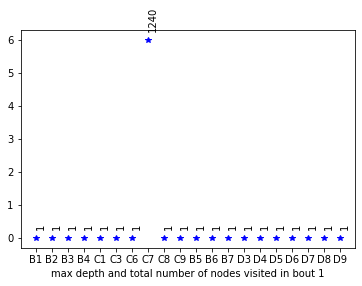

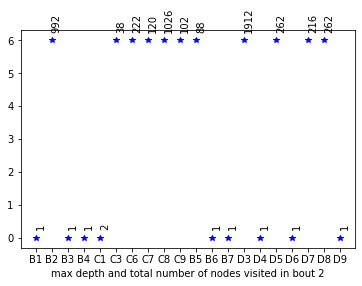

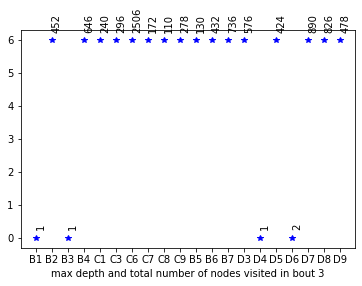

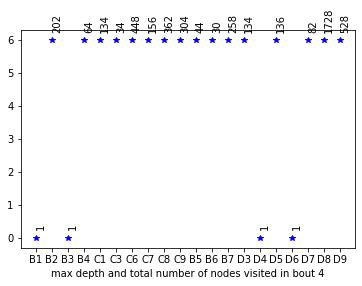

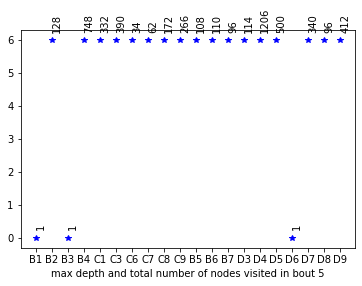

In [177]:
for i in range(5):
    for k, v in max_depth_first_bout.items():
        y = [x[0] for x in v[i:i+1]][0]
        x = AllNames.index(k)
        plt.plot(x, y, 'b*')
        plt.text(x, y+0.3, v[i:i+1][0][1], fontsize=10, rotation=90)
    plt.xticks(ticks=np.arange(0,20), labels=AllNames)
    plt.xlabel(f'max depth and total number of nodes visited in bout {i+1}')
    plt.show()

In [131]:
frames_to_rwd

array([ 12738,  18742,  22157,  44611,  69344,  73217,  76921,  81519,
        84227,  87063,  89864,  92891,  98173, 103021, 107009, 109806,
       117297, 121565, 128241, 132323, 135809, 138793, 141507, 144955,
       148763, 153850, 158069, 164369, 169529, 173607, 178044, 182955,
       187613, 190926, 194116, 197309, 200552, 213861, 219386, 226023,
       229110, 232067, 236229, 244540, 249792, 252665, 260040, 264162,
       274791, 277630, 283395, 288895, 297203, 300160, 303071, 307516,
       313052, 315887, 318934, 323014, 326135, 329743, 332509, 335985,
       339307, 342600, 351807, 355751, 359025, 362990, 371237, 374803,
       384357, 390627, 395376, 411785, 417765, 420792, 424178, 430036,
       433582, 444243, 447897, 450756, 453719, 457078, 460385, 464236,
       472706, 477269, 483182, 487107, 492914, 499565, 503983, 517530,
       523474, 528021, 531010, 536415, 542604, 548123, 555979, 559507,
       563160, 567564, 571116, 605934, 609874, 620059, 625509, 630075,
      

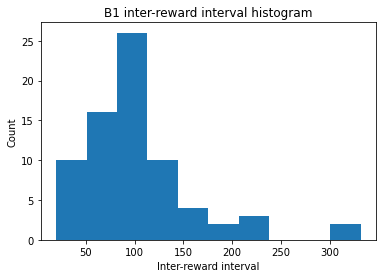

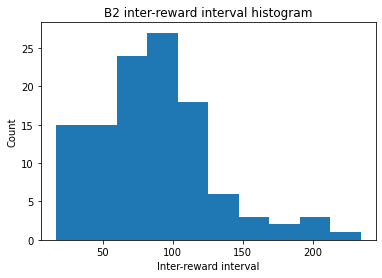

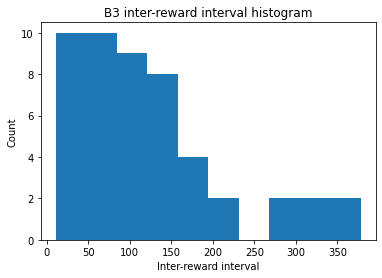

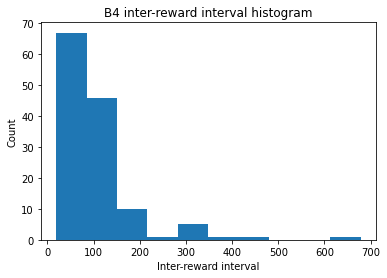

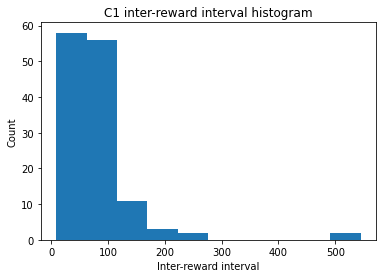

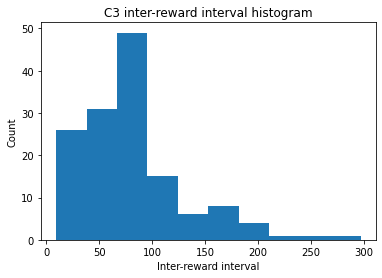

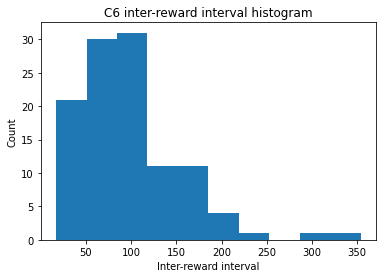

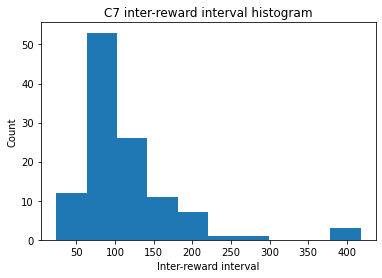

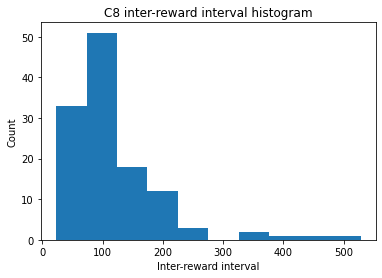

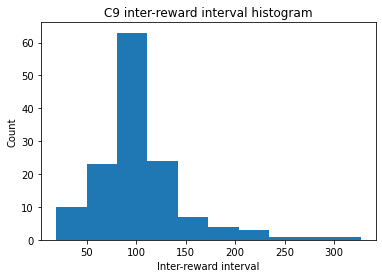

In [148]:
for nickname in RewNames:
# for nickname in AllNames:  # there is some error, gotta check later
    tf=LoadTraj(nickname+'-tf')
    frames_to_rwd = np.array([init_fr_rwd[0]+tf.fr[bout_idx,0] for bout_idx, frs_rwd in enumerate(tf.re) for init_fr_rwd in frs_rwd])
    times_to_rwd = np.array([TimeInMaze(frames_to_rwd[rwd_fr_i],tf) for rwd_fr_i, _ in enumerate(frames_to_rwd)])
    plt.figure()
    plt.hist(times_to_rwd[1:]-times_to_rwd[:-1])
    plt.title("%s inter-reward interval histogram" % nickname)
    plt.xlabel('Inter-reward interval')
    plt.ylabel('Count')

# Figure 4A

Check also: https://github.com/markusmeister/Rosenberg-2021-Repository/blob/main/Maze_Analysis_3C.ipynb

C1


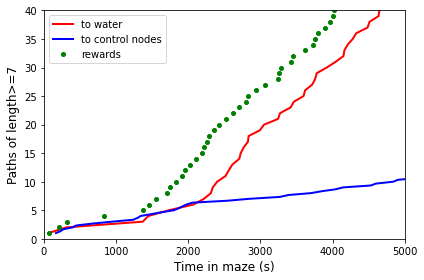

(0.0, 40.0)

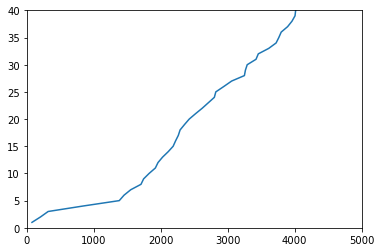

In [128]:
tf=LoadTraj(nickname+'-tf')
# make array of reward times in frames
re = np.array([y[0]+tf.fr[i,0] for i,r in enumerate(tf.re) for y in r])
# plot cumulative long paths, rewards, time in maze
ti=np.array(tf.fr.tolist()) # time in maze
ptn_1 = FindPathsToNode(116,tf,ma) # water
ptn_2 = FindPathsToNode(94,tf,ma) # three control nodes
ptn_3 = FindPathsToNode(95,tf,ma)
ptn_4 = FindPathsToNode(73,tf,ma)
lmin=7 # minimal length
ptn_m = ptn_1[np.where(ptn_1[:,2]>=lmin)] # impose minimal length
ptn_co_m = np.concatenate((ptn_2,ptn_3,ptn_4)) # combine the 3 control nodes
ptn_co_m = ptn_co_m[np.where(ptn_co_m[:,2]>=lmin)]
ptn_co_m = ptn_co_m[np.argsort(ptn_co_m[:,3])]
x=[TimeInMaze(p,tf) for p in ptn_m[:,3]]
y=np.arange(len(ptn_m))+1
ax=plot(x,y,fmts=['r-'],figsize=(6,4)) # cumulative paths to water
x=[TimeInMaze(p,tf) for p in ptn_co_m[:,3]]
y=np.arange(len(ptn_co_m))/3+1
plot(x,y,fmts=['b-'],axes=ax) # avg number of such paths to the control nodes
x=[TimeInMaze(p,tf) for p in re]
y=np.arange(len(re))+1
plot(x,y,fmts=['g.'],markersize=8,axes=ax,
     xlabel='Time in maze (s)',
     ylabel='Paths of length>={}'.format(lmin),
     legend=['to water','to control nodes','rewards'],
     xlim=[0,5000],ylim=[0,40]); # cumulative rewards
print(nickname)
plt.show();

x=[TimeInMaze(p,tf) for p in re]
y=np.arange(len(re))+1
plt.plot(x,y, label='rewards')
plt.xlim(0,5000)
plt.ylim(0,40)

B1


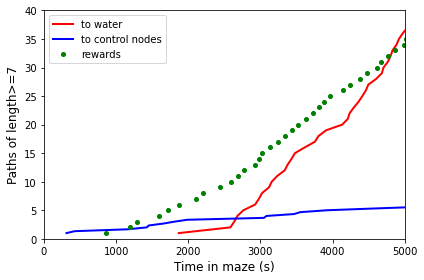

B2


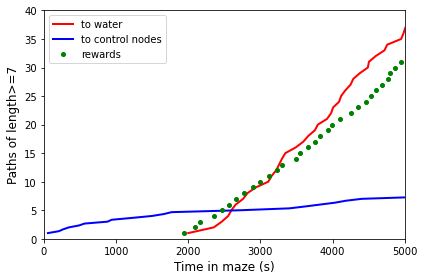

B3


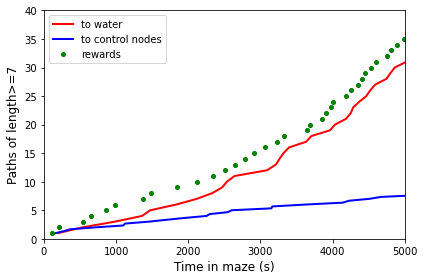

B4


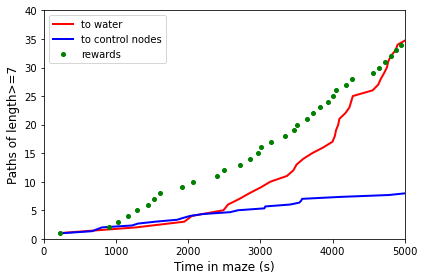

C1


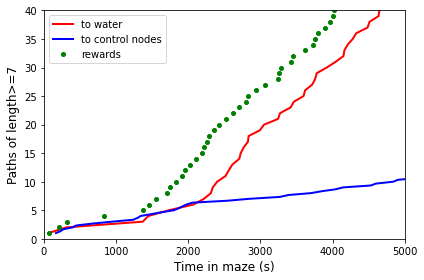

C3


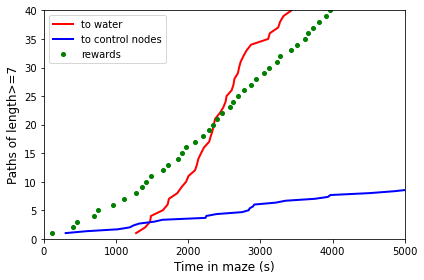

C6


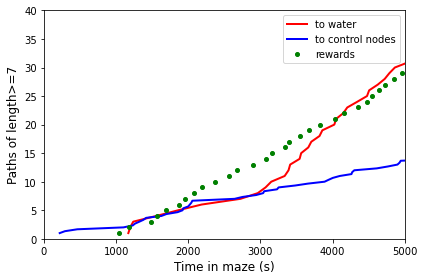

C7


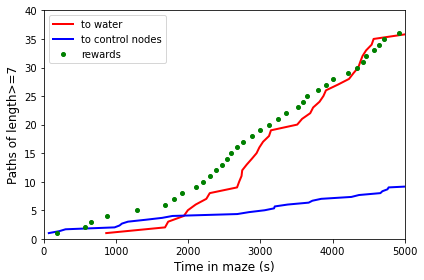

C8


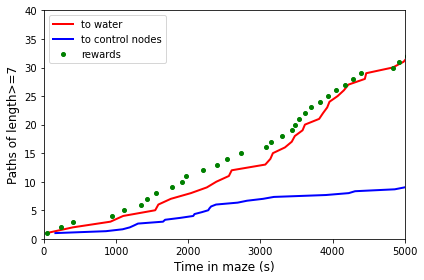

C9


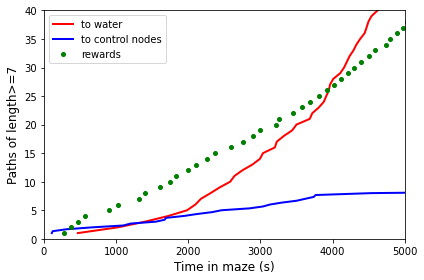

In [9]:
# plot long paths to water & control nodes vs time in maze for all animals, length>=7, time 0-5000 s
for nickname in RewNames:
    tf=LoadTraj(nickname+'-tf')
    # make array of reward times in frames
    re = np.array([y[0]+tf.fr[i,0] for i,r in enumerate(tf.re) for y in r])
    # plot cumulative long paths, rewards, time in maze
    ti=np.array(tf.fr.tolist()) # time in maze
    ptn_1 = FindPathsToNode(116,tf,ma) # water
    ptn_2 = FindPathsToNode(94,tf,ma) # three control nodes
    ptn_3 = FindPathsToNode(95,tf,ma)
    ptn_4 = FindPathsToNode(73,tf,ma)
    lmin=7 # minimal length
    ptn_m = ptn_1[np.where(ptn_1[:,2]>=lmin)] # impose minimal length
    ptn_co_m = np.concatenate((ptn_2,ptn_3,ptn_4)) # combine the 3 control nodes
    ptn_co_m = ptn_co_m[np.where(ptn_co_m[:,2]>=lmin)]
    ptn_co_m = ptn_co_m[np.argsort(ptn_co_m[:,3])]
    x=[TimeInMaze(p,tf) for p in ptn_m[:,3]]
    y=np.arange(len(ptn_m))+1
    ax=plot(x,y,fmts=['r-'],figsize=(6,4)) # cumulative paths to water
    x=[TimeInMaze(p,tf) for p in ptn_co_m[:,3]]
    y=np.arange(len(ptn_co_m))/3+1
    plot(x,y,fmts=['b-'],axes=ax) # avg number of such paths to the control nodes
    x=[TimeInMaze(p,tf) for p in re]
    y=np.arange(len(re))+1
    plot(x,y,fmts=['g.'],markersize=8,axes=ax,
         xlabel='Time in maze (s)',
         ylabel='Paths of length>={}'.format(lmin),
         legend=['to water','to control nodes','rewards'],
         xlim=[0,5000],ylim=[0,40]); # cumulative rewards
    print(nickname)
    plt.show();
plt.plot(re)